In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
audio_paths = []

In [3]:
for file_path in os.listdir('Songs_data/Audio_files/Aashiqui 2/'):
    audio_paths.append('Songs_data/Audio_files/Aashiqui 2/'+ file_path)

In [4]:
audio_paths

['Songs_data/Audio_files/Aashiqui 2/02 - A2 - Sunn Raha Hai [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/03 - A2 - Chahun Main Ya Naa [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/04 - A2 - Hum Mar Jayenge [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/05 - A2 - Meri Aashiqui [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/06 - A2 - Piya Aaye Na [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/07 - A2 - Bhula Dena [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/08 - A2 - Aasan Nahin Yahan [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/09 - A2 - Sunn Raha Hai (Female) [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/10 - A2 - Milne Hai Mujhse Aayi [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/11 - A2 - Aashiqui (The Love Theme) [DJMaza].mp3',
 'Songs_data/Audio_files/Aashiqui 2/Love Mashup - (Raag.Fm).mp3']

In [5]:
y, sr = librosa.load(audio_paths[0])

In [6]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
chroma = np.mean(chroma, axis=1)

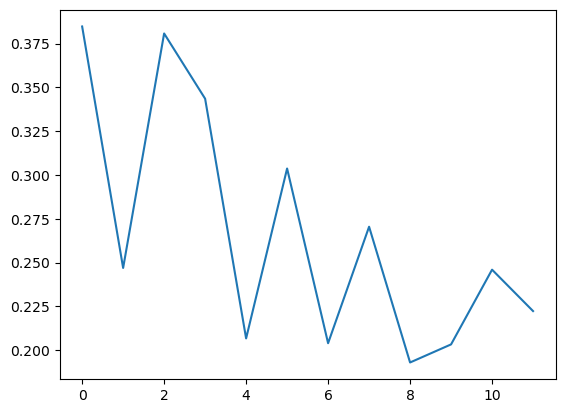

In [7]:
plt.plot(chroma)

In [8]:
y, sr = librosa.load(audio_paths[-4])
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
chroma = np.mean(chroma, axis=1)

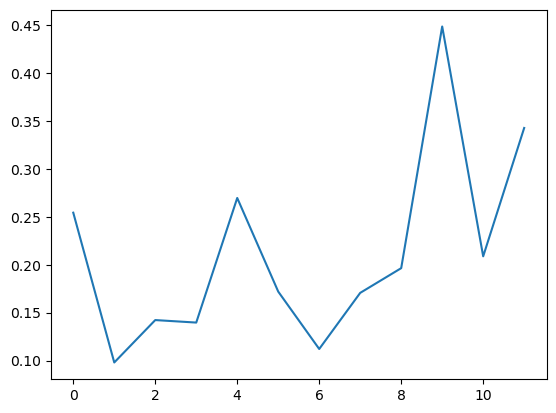

In [9]:
plt.plot(chroma)

In [10]:
import librosa
import numpy as np
from scipy.spatial.distance import cosine

# Function to extract features from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs = np.mean(mfccs, axis=1)
    
    # Extract Chroma Features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma = np.mean(chroma, axis=1)
    
    # Extract Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_contrast = np.mean(spectral_contrast, axis=1)
    
    # Extract Tonnetz Features
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
    tonnetz = np.mean(tonnetz, axis=1)
    
    # Combine all features into a single vector
    features = np.concatenate([mfccs, chroma, spectral_contrast, tonnetz])
    
    return features

# Function to calculate cosine similarity between two feature vectors
def calculate_similarity(features1, features2):
    return 1 - cosine(features1, features2)

# Paths to the two audio files (replace with actual file paths)
file_path1 = audio_paths[0]
file_path2 = audio_paths[8]

# Extract features from both songs
features_song1 = extract_features(file_path1)
features_song2 = extract_features(file_path2)

# Calculate the similarity score
similarity_score = calculate_similarity(features_song1, features_song2)
print(f"Similarity Score: {similarity_score:.4f}")

# Combine the scores (here, it's just one score for demonstration)
final_similarity_score = similarity_score

print(f"Final Similarity Score between the songs: {final_similarity_score:.4f}")


Similarity Score: 0.9903
Final Similarity Score between the songs: 0.9903


In [11]:
file_path1 = audio_paths[0]
file_path2 = audio_paths[-1]

features_song1 = extract_features(file_path1)
features_song2 = extract_features(file_path2)

similarity_score = calculate_similarity(features_song1, features_song2)
print(f"Similarity Score: {similarity_score:.4f}")

final_similarity_score = similarity_score

print(f"Final Similarity Score between the songs: {final_similarity_score:.4f}")

Similarity Score: 0.9748
Final Similarity Score between the songs: 0.9748


In [12]:
file_path1 = audio_paths[4]
file_path2 = audio_paths[6]

features_song1 = extract_features(file_path1)
features_song2 = extract_features(file_path2)

similarity_score = calculate_similarity(features_song1, features_song2)
print(f"Similarity Score: {similarity_score:.4f}")

final_similarity_score = similarity_score

print(f"Final Similarity Score between the songs: {final_similarity_score:.4f}")

Similarity Score: 0.9844
Final Similarity Score between the songs: 0.9844


In [13]:
#!pip install fastdtw

DTW Distance between the songs: 2867607.665134801


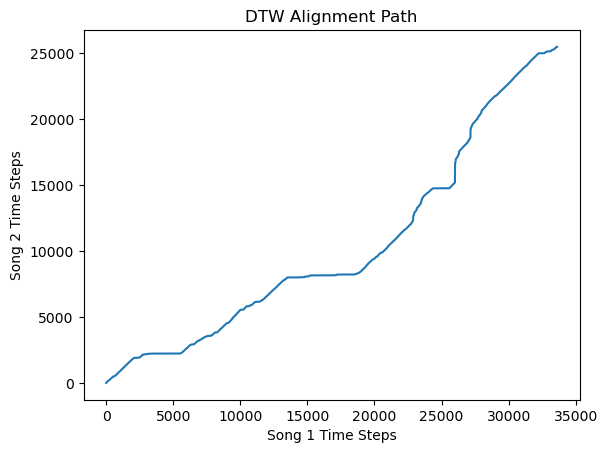

In [14]:
import librosa
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import numpy as np

# Load two audio files
y1, sr1 = librosa.load(audio_paths[0], sr=None)
y2, sr2 = librosa.load(audio_paths[8], sr=None)

# Extract MFCC features
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13)

# Transpose to have time steps as rows
mfcc1 = mfcc1.T
mfcc2 = mfcc2.T

# Calculate DTW distance
distance, path = fastdtw(mfcc1, mfcc2, dist=euclidean)

print(f"DTW Distance between the songs: {distance}")

# Optional: Visualize the alignment path
import matplotlib.pyplot as plt

plt.plot(np.array(path)[:, 0], np.array(path)[:, 1])
plt.xlabel('Song 1 Time Steps')
plt.ylabel('Song 2 Time Steps')
plt.title('DTW Alignment Path')
plt.show()
